In [1]:
%matplotlib inline
import betterplotlib as bpl
from pathlib import Path
from matplotlib import cm
from matplotlib import colors as mpl_col

bpl.set_style()

Import the groupings

In [2]:
import plot_utils

# Then plot everything as a check

In [3]:
def get_axes():
    all_plots = ["All"]
    for sim_dir, plots in plot_utils.names.items():
        for plot in plots.keys():
            all_plots.append(plot)
    return sorted(list(set(all_plots)))

In [4]:
def format_name(dir_name):
    out = str(dir_name)
    out = out.replace("/Users/gillenb/art_runs/runs/", "")
    out = out.replace("stampede2/production/", "")
    out = out.replace("stampede2/old_ic_comparison_production_analog/", "")
    out = out.replace("/run", "")
    out = out.replace("/out", "")
    return out

In [5]:
def test_plot(group_name):
    fig, ax = bpl.subplots()
    i = 0
    di = 1
    for sim, groups in plot_utils.names.items():
        if group_name in groups or (group_name == "All" and len(groups) > 0):
            if group_name == "All":
                label = format_name(sim)
            else:
                label = plot_utils.names[sim][group_name]
            
            ax.fill_between(x=[0, 1], y1=[i, i], y2=[i+di, i+di], 
                            color=plot_utils.colors[sim])
            ax.add_text(text=label, x=0.5, y=i + 0.5 * di, fontsize=10,
                       ha="left", va="center", color="k")
            ax.add_text(text=label, x=0.5, y=i + 0.5 * di, fontsize=10,
                       ha="right", va="center", color="w")
            i += di
    ax.set_limits(0, 1, 0, i)
    ax.set_title(group_name)
    ax.remove_labels("both")
    ax.remove_spines(["all"])

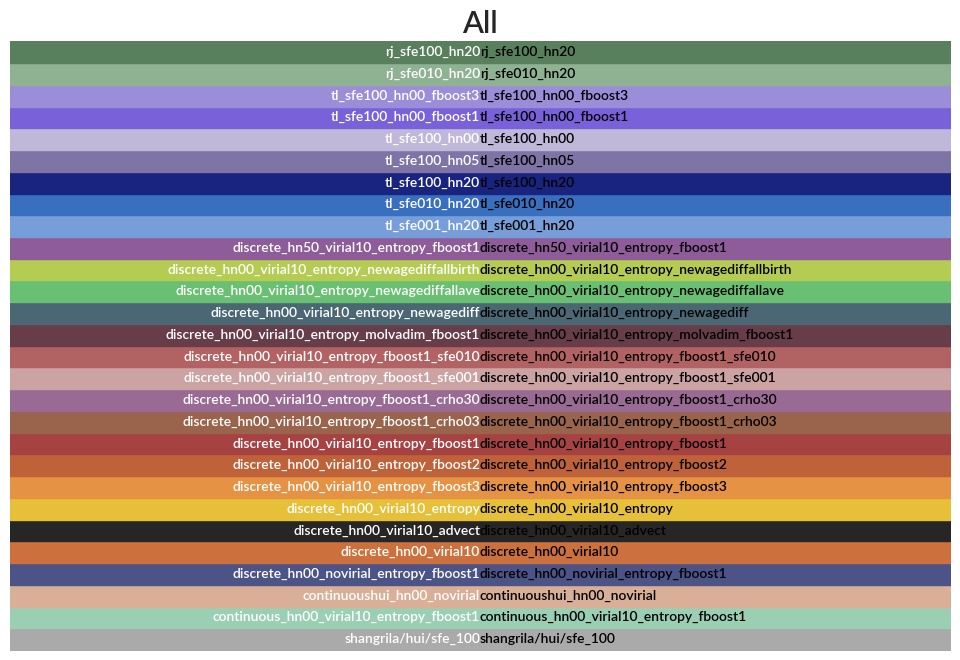

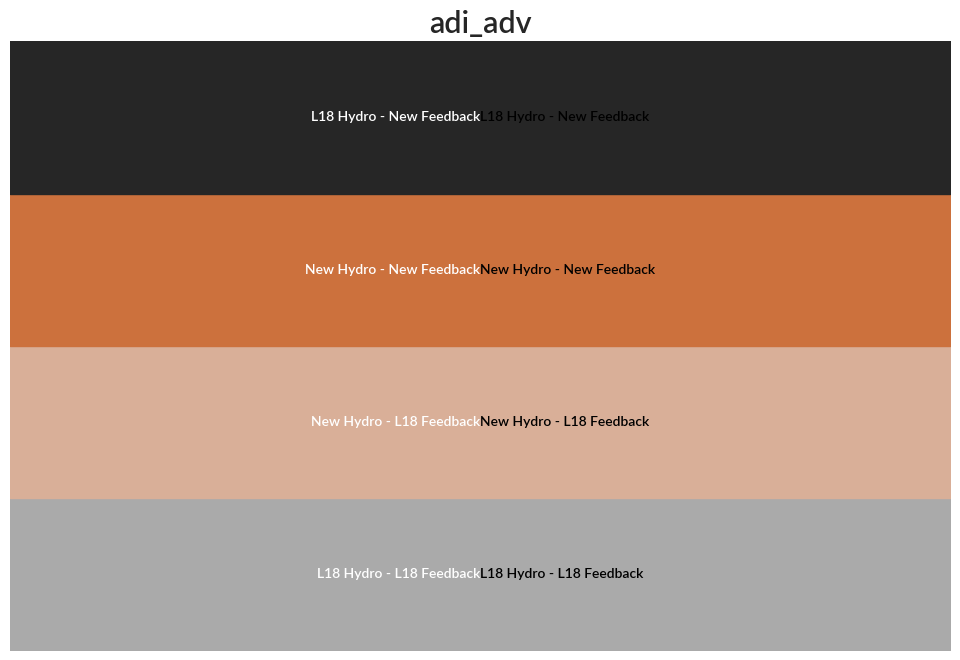

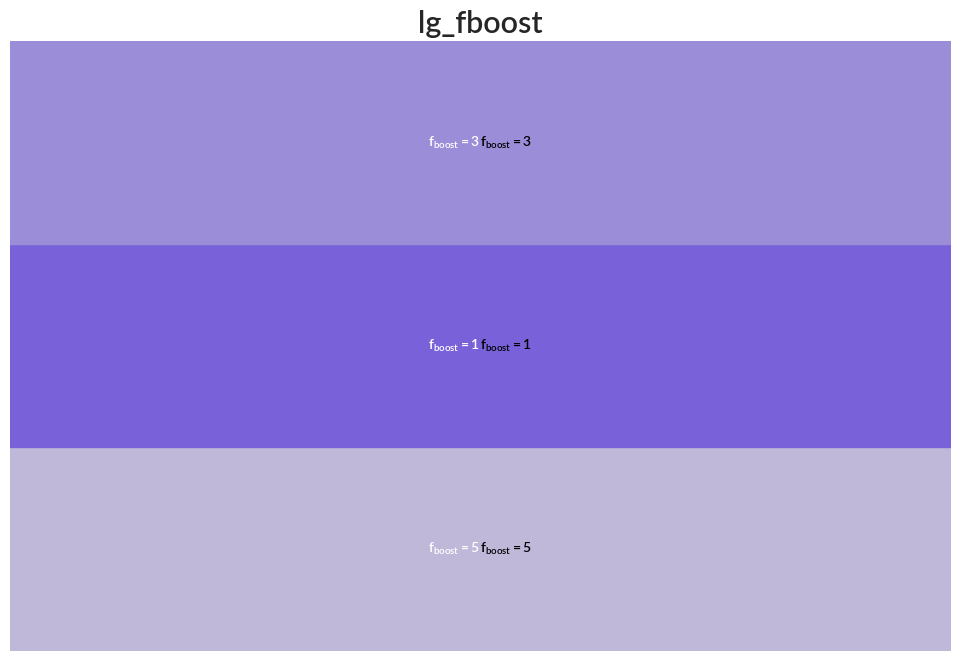

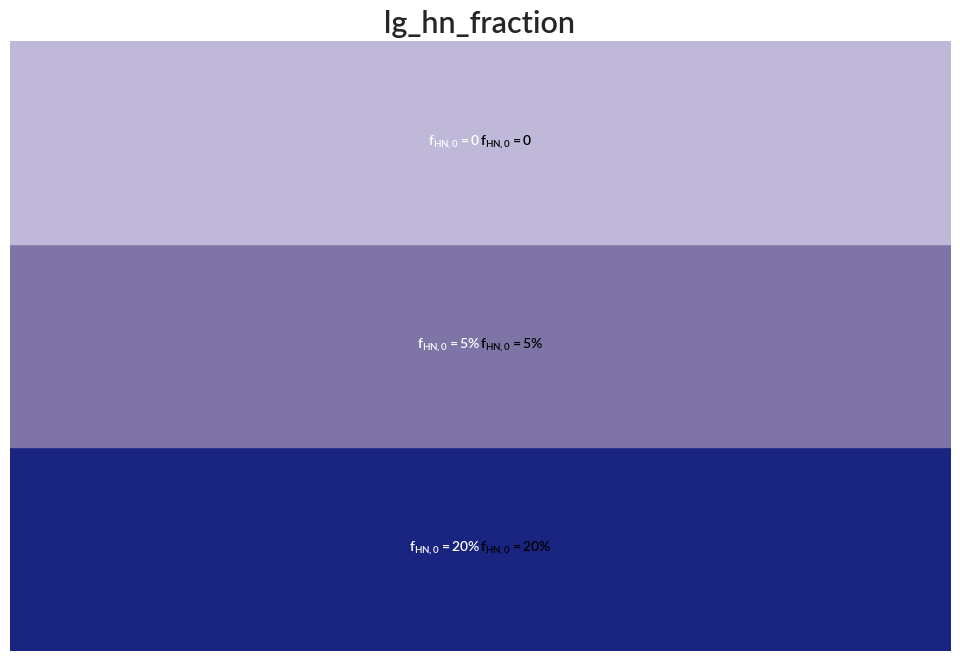

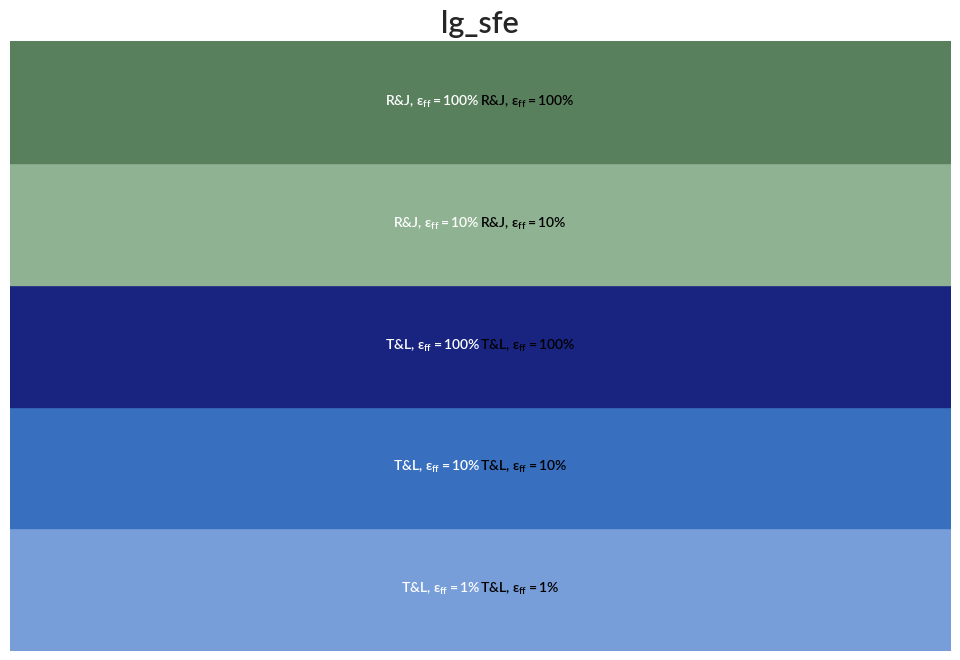

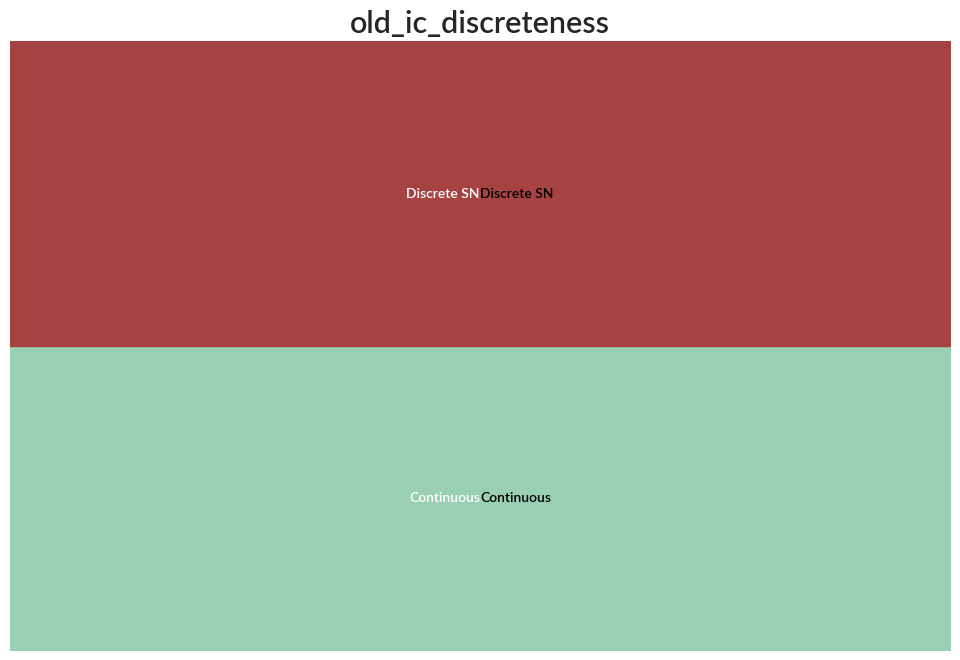

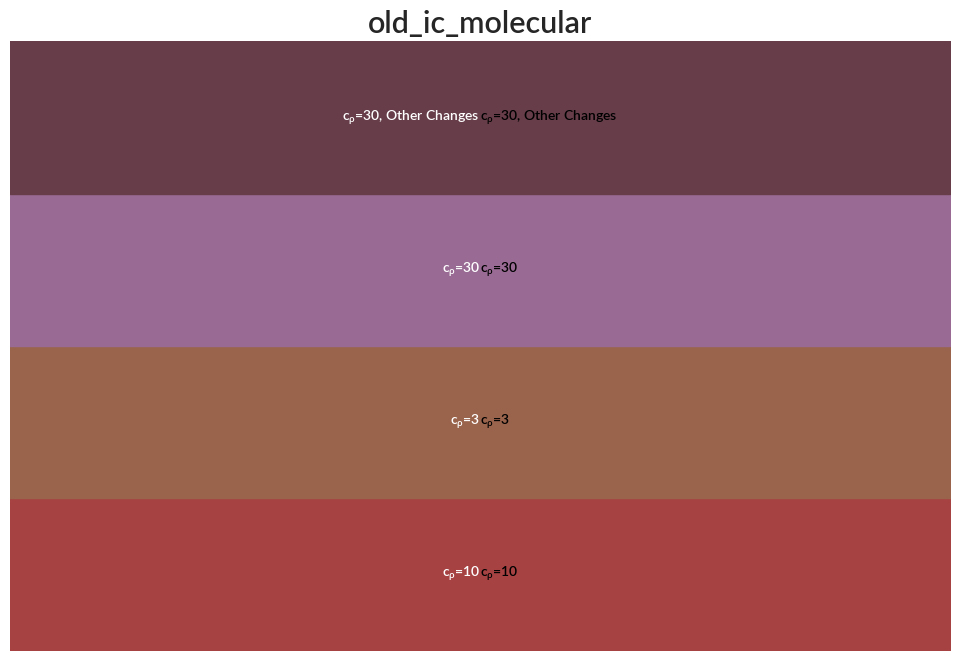

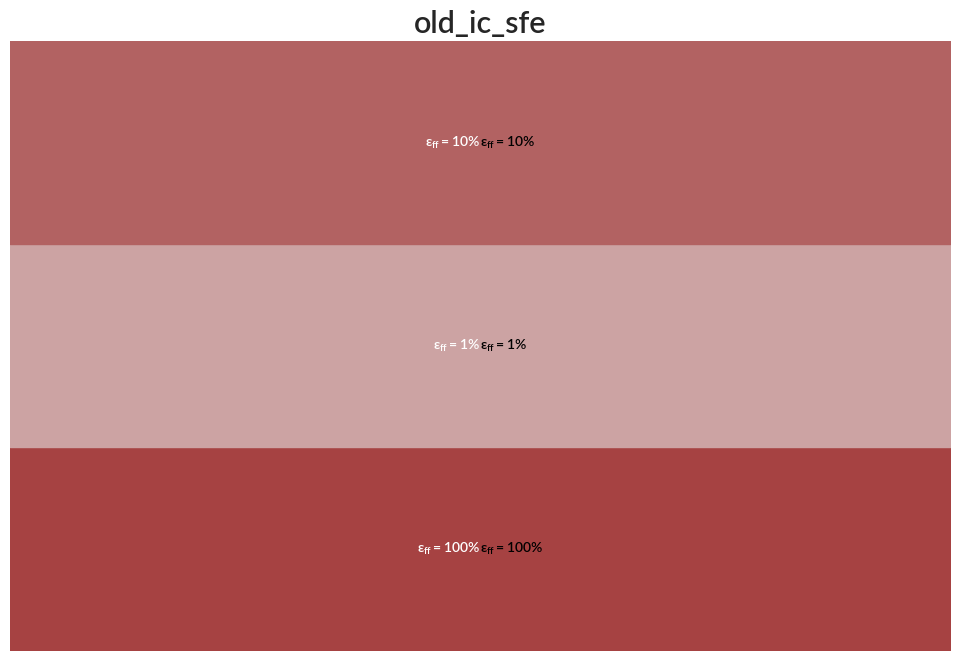

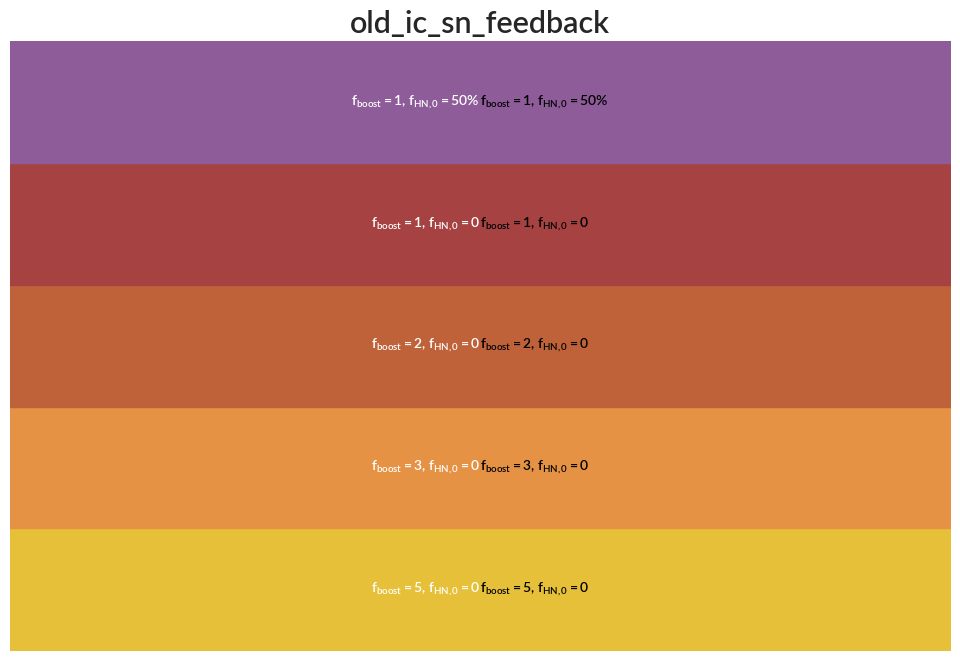

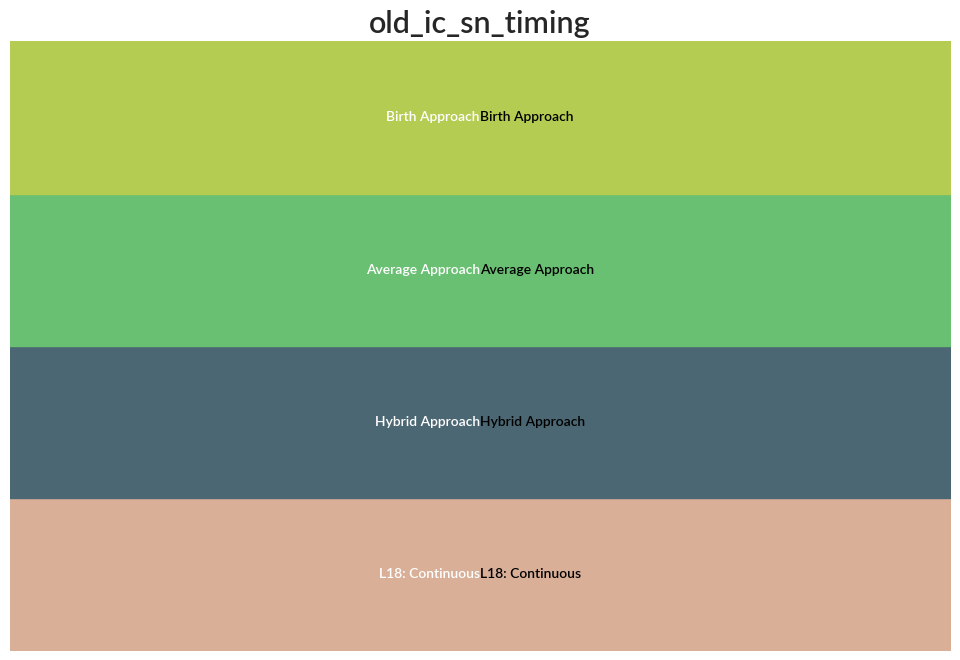

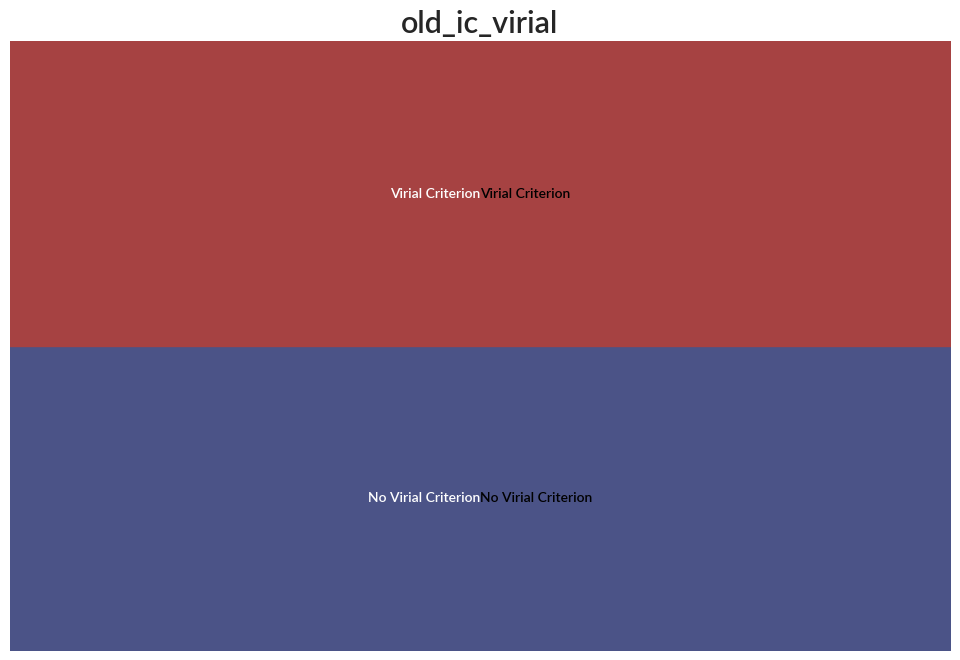

In [6]:
for n in get_axes():
    test_plot(n)

# A plot where the colors are sorted according to their hue, to compare similarity

In [7]:
def hex_to_hsv(hex_color):
    return mpl_col.rgb_to_hsv(mpl_col.to_rgb(hex_color))

0.0
0.0
0.0
0.0
0.0
0.04978354978354979
0.05099502487562189
0.05897435897435899
0.0606060606060606
0.07971014492753624
0.13005780346820808
0.1994535519125683
0.34761904761904755
0.35042735042735046
0.3507751937984496
0.4102564102564102
0.5499999999999999
0.599502487562189
0.6003401360544217
0.6444444444444445
0.6488673139158576
0.6988795518207284
0.6995614035087719
0.7000000000000001
0.702020202020202
0.8005464480874318
0.8514492753623187
0.951219512195122


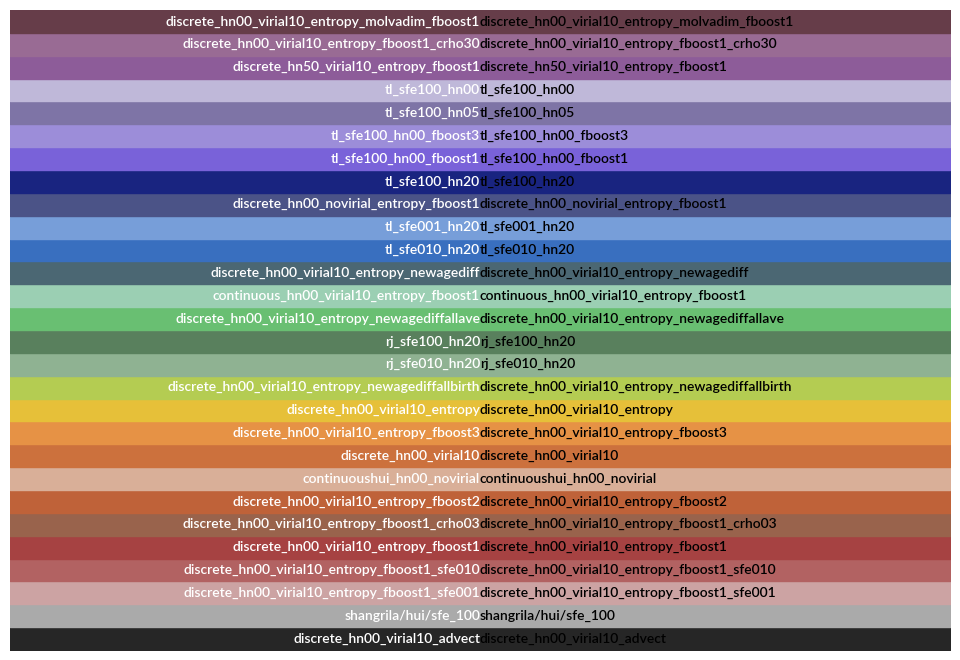

In [8]:
hsv = []
for sim, groups in plot_utils.names.items():
    if len(groups) > 0:
        this_color = plot_utils.colors[sim]
        h, s, v = hex_to_hsv(this_color)
        hsv.append([h, s, v, sim])
        
def sort_key_hsv(hsvn):
    h, s, v, name = hsvn
    out = f"{h:.10f} {s:.10f} {v:.10f}"
    return out
    
sorted_hsv = sorted(hsv, key=lambda hsvn: sort_key_hsv(hsvn))

fig, ax = bpl.subplots()
i = 0
di = 1
for hsvn in sorted_hsv:
    h, s, v, n = hsvn
    print(h)
    this_color = mpl_col.to_hex(mpl_col.hsv_to_rgb([h, s, v]))
    
    label = format_name(n)

    ax.fill_between(x=[0, 1], y1=[i, i], y2=[i+di, i+di], 
                    color=this_color)
    ax.add_text(text=label, x=0.5, y=i + 0.5 * di, fontsize=10,
               ha="left", va="center", color="k")
    ax.add_text(text=label, x=0.5, y=i + 0.5 * di, fontsize=10,
               ha="right", va="center", color="w")
    i += di
ax.set_limits(0, 1, 0, i)
ax.remove_labels("both")
ax.remove_spines(["all"])